# analysis of DNA-MERFISH for CTP11

by Pu Zheng

2021.11.17

analysis for dataset:

* \\10.245.74.158\Chromatin_NAS_1\20211115-P_brain_CTP11-500_DNA_only

# Load basic functions

In [16]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

29904


# 0. fov parameters

In [17]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_1\20211115-P_brain_CTP11-500_DNA_only',
             'save_folder':r'I:\Pu_Temp\Aire\20211115-P_brain_CTP11-500_DNA_only',
             'experiment_type': 'DNA',
             'num_threads': 25,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor',
             'shared_parameters':{
                     'single_im_size':[60,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':500,
                     'max_num_seeds': None,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             'ref_id': 0, # special for this experiment
             }


In [19]:
_fov_id = 6
# create fov class
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 64
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_1\20211115-P_brain_CTP11-500_DNA_only\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C38', 'H1C1', 'H2C2', 'H3C3', 'H4C4', 'H5C5', 'H6C6', 'H7C7', 'H8C8', 'H9C9', 'H10C10', 'H11C11', 'H12C12', 'H13C13', 'H14C14', 'H15C15', 'H16C16', 'H17C17', 'H18C18', 'H19C19', 'H20C20', 'H21C21', 'H22C22', 'H23C23', 'H24C24', 'H25C25', 'H26C50', 'H27C26', 'H28C27', 'H29C28', 'H30C29', 'H31C30', 'H32C31', 'H33C32', 'H34C33', 'H35C34', 'H36C35', 'H37C36', 'H38C37', 'H40C39', 'H41C40', 'H42C41', 'H43C42', 'H44C43', 'H45C44', 'H46C45', 'H47C46', 'H48C47', 'H49C48', 'H50C49'])
- 30 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
++ load chro

In [20]:
_overwrite = False
# 2. Process image into candidate spots
fov.parallel=True
fov.combo_ref_id = 0

fov._process_image_to_spots('combo', 
                            #_sel_ids = [74, 75],
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=True,
                            _warp_images=False, 
                            _fit_spots=True,
                            #_fit_in_mask=True, _fitting_args={'seed_mask':dialated_mask},
                            _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                            _overwrite_spot=_overwrite,
                            _verbose=True)

-- folders not selected, allow processing all 30 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211115-P_brain_CTP11-500_DNA_only\H0C38\Conv_zscan_06.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211115-P_brain_CTP11-500_DNA_only\H0C38\Conv_zscan_06.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211115-P_brain_CTP11-500_DNA_only\H0C38\Conv_zscan_06.dax  in 5.181s
-- removing hot pixels for channels:['488'] in 11.917s
-- correct Z-shifts for channels:['488'] in 9.695s
-- illumination correction for channels: 488, in 3.824s
-- -- generate translation function with drift:[0. 0. 0.] in 0.001s
-- finish correction in 31.784s
-- saving fov_info to file: I:\Pu_Temp\Aire\20211115-P_brain_CTP11-500_DNA_only\Conv_zscan_06.hdf5
++ base attributes saved:['combo_ref_im'] in 9.704s.
-- checking combo, region:[74 75] in 0.012s.


In [14]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ims = _grp['ims'][:]
    #combo_ids = _grp['ids'][:]

<IPython.core.display.Javascript object>


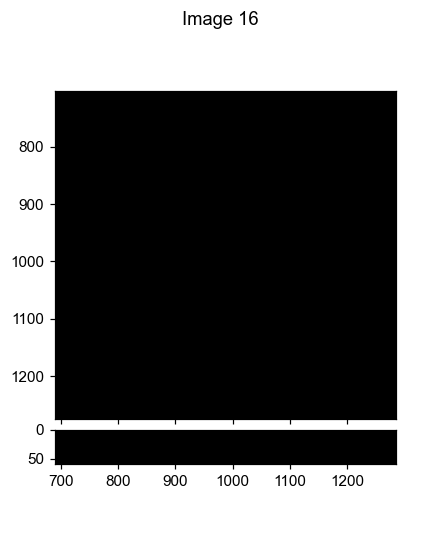

In [15]:
visual_tools.imshow_mark_3d_v2(combo_ims)

In [21]:
fov._load_from_file('combo')

+ loading combo from file: I:\Pu_Temp\Aire\20211115-P_brain_CTP11-500_DNA_only\Conv_zscan_06.hdf5
++ finish loading combo in 0.226s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1642: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


In [22]:
fov.combo_drifts

array([[ -0.6333333 ,   8.26      , -13.446667  ],
       [ -0.6333333 ,   8.26      , -13.446667  ],
       [ -0.38333333,   6.6466665 , -12.63      ],
       [ -0.38333333,   6.6466665 , -12.63      ],
       [ -0.59      ,   3.6733334 , -14.67      ],
       [ -0.59      ,   3.6733334 , -14.67      ],
       [ -1.3166667 ,   5.31      , -14.433333  ],
       [ -1.3166667 ,   5.31      , -14.433333  ],
       [ -0.56333333,   6.03      , -16.143333  ],
       [ -0.56333333,   6.03      , -16.143333  ],
       [ -0.18666667,   6.1033335 , -16.046667  ],
       [ -0.18666667,   6.1033335 , -16.046667  ],
       [ -0.25      ,   4.28      , -15.76      ],
       [ -0.25      ,   4.28      , -15.76      ],
       [ -0.2       ,   6.4733334 , -15.833333  ],
       [ -0.2       ,   6.4733334 , -15.833333  ],
       [ -0.26333332,   5.3233333 , -15.8       ],
       [ -0.26333332,   5.3233333 , -15.8       ],
       [ -0.5       ,   8.236667  , -15.12      ],
       [ -0.5       ,   8.23666